# Pre-amble

In [1]:
# loading the required packages
import pandas as pd
import numpy as np
import datetime
import random
import re
import os
import plotnine
from plotnine import *

# for repeated printouts 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to custom displays of row-column df printouts
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Data import and basic dataset information

## Intake data

Here, we load the analysis-ready intake data, and print out some of the basic information about the data:

In [2]:
# loading the intake data
intake_analysis = pd.read_csv('../data/csv/intake_analysis.csv')

# then, we filter only for the black/white defendants 
intake_bw = intake_analysis[(intake_analysis.is_white == True) | 
                            (intake_analysis.is_black == True)].copy()

In [3]:
# printing out the basic info
intake_bw.shape
intake_bw.dtypes

(369399, 36)

Unnamed: 0                   int64
CASE_ID                      int64
CASE_PARTICIPANT_ID          int64
RECEIVED_DATE               object
OFFENSE_CATEGORY            object
PARTICIPANT_STATUS          object
AGE_AT_INCIDENT            float64
RACE                        object
GENDER                      object
INCIDENT_CITY               object
INCIDENT_BEGIN_DATE         object
INCIDENT_END_DATE           object
LAW_ENFORCEMENT_AGENCY      object
LAW_ENFORCEMENT_UNIT        object
ARREST_DATE                 object
FELONY_REVIEW_DATE          object
FELONY_REVIEW_RESULT        object
UPDATE_OFFENSE_CATEGORY     object
is_black                    object
is_hispanic                   bool
is_white                    object
is_hisp                    float64
is_female                   object
age_cleaned                float64
felony_review_date          object
felony_review_year         float64
felony_review_month        float64
felony_review_day          float64
felony_review_ym    

In [4]:
# printing out the head of the df
intake_bw.sample(10)

,Unnamed: 0,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PARTICIPANT_STATUS,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,UPDATE_OFFENSE_CATEGORY,is_black,is_hispanic,is_white,is_hisp,is_female,age_cleaned,felony_review_date,felony_review_year,felony_review_month,felony_review_day,felony_review_ym,sa_office_period,sa_timedelta,BRA_period,BRA_timedelta,fr_is_approved,fr_is_rejected,fr_is_investigated
170725,170725,538494864539,383078764251,06/17/2014,Narcotics,Approved,48.0,White,Male,Chicago,06/15/2014,NaN,ISP DISTRICT 03,NaN,06/15/2014 03:14:00 PM,NaN,NaN,Narcotics,False,False,True,NaN,False,48.0,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,False,False
69197,69197,519265513007,361566743025,06/01/2012,Retail Theft,Approved,27.0,White,Male,Chicago,06/01/2012,NaN,CHICAGO PD,District 8 - Chicago Lawn,06/01/2012 05:30:00 PM,06/01/2012,Approved,Retail Theft,False,False,True,NaN,False,27.0,2012-06-01,2012.0,6.0,1.0,2012-06,False,-54.0,False,-60.0,True,False,False
406261,406261,585248901861,437804730641,06/06/2020,UUW - Unlawful Use of Weapon,Approved,26.0,Black,Male,Chicago,06/06/2020,NaN,CHICAGO PD,NaN,06/06/2020 04:18:00 PM,06/06/2020,Approved,UUW - Unlawful Use of Weapon,True,False,False,NaN,False,26.0,2020-06-06,2020.0,6.0,6.0,2020-06,True,42.0,True,36.0,True,False,False
75446,75446,520424148681,362808665391,07/16/2012,Retail Theft,Approved,18.0,Black,Male,Chicago,07/16/2012,NaN,CHICAGO PD,NaN,07/16/2012 03:57:00 PM,07/17/2012,Approved,Retail Theft,True,False,False,NaN,False,18.0,2012-07-17,2012.0,7.0,17.0,2012-07,False,-53.0,False,-59.0,True,False,False
447941,447941,594000427065,448785477316,12/08/2021,Possession of Stolen Motor Vehicle,NaN,39.0,White,Male,Midlothian,12/08/2021,NaN,MIDLOTHIAN PD,NaN,12/07/2021 12:59:00 AM,12/08/2021,Continued Investigation,Possession of Stolen Motor Vehicle,False,False,True,NaN,False,39.0,2021-12-08,2021.0,12.0,8.0,2021-12,True,60.0,True,54.0,False,False,True
438622,438622,592021269145,446355087316,07/19/2021,Homicide,NaN,24.0,Black,Male,Chicago,07/18/2021,NaN,CHICAGO PD,NaN,NaN,07/20/2021,Felony Review,Homicide,True,False,False,NaN,False,24.0,2021-07-20,2021.0,7.0,20.0,2021-07,True,55.0,True,49.0,False,False,False
454321,454321,595359483794,450409245572,03/18/2022,UUW - Unlawful Use of Weapon,NaN,23.0,Black,Male,Chicago,03/18/2022,NaN,CHICAGO PD,NaN,03/18/2022 05:41:00 AM,03/18/2022,Rejected,UUW - Unlawful Use of Weapon,True,False,False,NaN,False,23.0,2022-03-18,2022.0,3.0,18.0,2022-03,True,63.0,True,57.0,False,True,False
181578,181578,540589769503,385497013841,09/05/2014,Theft,Approved,18.0,Black,Male,Chicago,09/05/2014,NaN,CHICAGO PD,District 18 - Near North,09/05/2014 08:41:00 AM,09/05/2014,Approved,Theft,True,False,False,NaN,False,18.0,2014-09-05,2014.0,9.0,5.0,2014-09,False,-27.0,False,-33.0,True,False,False
196036,196036,543333518213,388678124308,01/06/2015,Narcotics,Approved,27.0,Black,Male,Chicago,12/29/2014,NaN,CHICAGO PD,District 7 - Englewood,12/29/2014 07:30:00 PM,NaN,NaN,Narcotics,True,False,False,NaN,False,27.0,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,False,False
444813,444813,593347699191,447982502311,10/19/2021,Retail Theft,Approved,25.0,Black,Male,Homewood,10/19/2021,NaN,HOMEWOOD PD,NaN,10/19/2021 12:25:00 PM,10/19/2021,Approved,Retail Theft,True,False,False,NaN,False,25.0,2021-10-19,2021.0,10.0,19.0,2021-10,True,58.0,True,52.0,True,False,False


## Sentencing data

Here, we'll load our analysis-ready sentencing data, and print out some of the basic information about the data:

In [5]:
# loading the analysis-ready dataset
sentencing_analysis = pd.read_csv('../data/csv/sentencing_analysis.csv')

# we then filter for only black/white defendants
sentencing_bw = sentencing_analysis[(sentencing_analysis.is_black == True) | 
                                    (sentencing_analysis.is_white == True)].copy()

C:\Users\Sean Hambali\AppData\Local\Temp\ipykernel_20456\1287713787.py:2: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.


In [6]:
# printing out basic dataset info
sentencing_bw.dtypes

CASE_ID                                  int64
CASE_PARTICIPANT_ID                      int64
RECEIVED_DATE                           object
OFFENSE_CATEGORY                        object
PRIMARY_CHARGE_FLAG                       bool
CHARGE_ID                                int64
CHARGE_VERSION_ID                        int64
DISPOSITION_CHARGED_OFFENSE_TITLE_x     object
CHARGE_COUNT                             int64
DISPOSITION_DATE                        object
DISPOSITION_CHARGED_CHAPTER             object
DISPOSITION_CHARGED_ACT                 object
DISPOSITION_CHARGED_SECTION             object
DISPOSITION_CHARGED_CLASS               object
DISPOSITION_CHARGED_AOIC                object
CHARGE_DISPOSITION                      object
CHARGE_DISPOSITION_REASON               object
SENTENCE_JUDGE                          object
SENTENCE_COURT_NAME                     object
SENTENCE_COURT_FACILITY                 object
SENTENCE_PHASE                          object
SENTENCE_DATE

In [7]:
# printing a sample of the dataset
sentencing_analysis.sample(n=10)

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE_x,CHARGE_COUNT,DISPOSITION_DATE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_JUDGE,SENTENCE_COURT_NAME,SENTENCE_COURT_FACILITY,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_TYPE,CURRENT_SENTENCE_FLAG,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,is_black,is_hisp,is_white,is_female,age_cleaned,sentence_date,sentence_year,sentence_month,sentence_day,sentence_ym,sa_office_period,sa_timedelta,sa_timedelta_days,BRA_period,BRA_timedelta,BRA_timedelta_days,sentencing_num,sentencing_term_d,sentencing_term_y,is_incarcerated,is_on_probation,regrouped_offense,eligible_offense,DISPOSITION_CHARGED_OFFENSE_TITLE_y,uccs_code,probability,mfj_code,ncrp_code,ncic_code,nibrs_code,charge_desc,offense_category_code,offense_category_desc,offense_type_code,offense_type_desc
99411,542679430893,387921772168,12/03/2014 12:00:00 AM,Retail Theft,True,9514927819633,964325155628,RETAIL THEFT,1,02/27/2015 12:00:00 AM,720,5,16-25(a)(1),3,16722,Plea Of Guilty,NaN,Geary W Kull,District 4 - Maywood,Maywood Courthouse,Original Sentencing,02/27/2015 12:00:00 AM,Probation,True,Probation,1.0,Year(s),60.0,35.0,Black,Female,River Forest,12/03/2014 12:00:00 AM,NaN,RIVER FOREST PD,NaN,12/03/2014 03:47:00 PM,12/03/2014 12:00:00 AM,Approved,12/29/2014 12:00:00 AM,Retail Theft,True,False,False,1.0,35.0,2015-02-27,2015,2,27,2015-02,False,-22,-643,False,-28,-836,1.0,365.0,1.0,False,True,Retail Theft,False,RETAIL THEFT,2070,0.999476,165,250,2301;2302;2303;2304;2305;2306;2307;2308;2309;2...,23A;23B;23C;23D;23E;23F;23G;23H,"Theft, Value Unknown",26,Larceny/theft - value unknown,2,Property
24601,510871133462,352819370120,07/13/2011 12:00:00 AM,Narcotics,True,8538014844779,873986070965,ATTEMPT POSSESSION OF A CONTROLLED SUBSTANCE,1,11/15/2011 12:00:00 AM,720,5,8-4(570/402(c)),A,5101110,Plea Of Guilty,NaN,Raymond Myles,District 1 - Chicago,26TH Street,Original Sentencing,11/15/2011 12:00:00 AM,Probation,True,Probation,2,Year(s),98.0,20.0,Black,Male,Chicago,06/28/2011 12:00:00 AM,NaN,CHICAGO PD,District 10 - Ogden,06/28/2011 11:21:00 AM,NaN,NaN,08/09/2011 12:00:00 AM,Narcotics,True,False,False,0.0,20.0,2011-11-15,2011,11,15,2011-11,False,-61,-1843,False,-67,-2036,2.0,730.0,2.0,False,True,Narcotics,True,ATTEMPT POSSESSION OF A CONTROLLED SUBSTANCE,3161,0.865043,291,NaN,NaN,NaN,"Possession/Use, Drug Unspecified, Attempted",50,Possession/use - drug unspecified,3,Drug
1264,294101196767,106210858845,06/17/2009 12:00:00 AM,PROMIS Conversion,True,2677825358635,407331198397,FAIL REPORT ANNUALLY/2ND+,1,03/21/2011 12:00:00 AM,730-150\6-7,NaN,NaN,2,0000013780,Plea Of Guilty,NaN,Joseph Michael Claps,District 1 - Chicago,26TH Street,Original Sentencing,03/21/2011 12:00:00 AM,Prison,True,Illinois Department of Corrections,3.0,Year(s),NaN,38.0,Black,Male,NaN,06/17/2009 12:00:00 AM,NaN,C P D AREA 1 DIST 7,NaN,06/17/2009 08:30:00 AM,06/17/2009 12:00:00 AM,Sf,NaN,PROMIS Conversion,True,False,False,0.0,38.0,2011-03-21,2011,3,21,2011-03,False,-69,-2082,False,-75,-2275,3.0,1095.0,3.0,True,False,PROMIS Conversion,False,FAIL REPORT ANNUALLY/2ND+,6010,0.904138,475,550,5499,NaN,"Traffic Offense, Minor",84,Traffic offenses - minor,6,Criminal traffic
144787,564047578047,413114460946,08/23/2017 12:00:00 AM,UUW - Unlawful Use of Weapon,True,10241664690783,1039383089175,ARMED HABITUAL CRIMINAL,1,07/09/2018 12:00:00 AM,720,5,24-1.7(a),X,0013855,Plea Of Guilty,NaN,William Raines,District 5 - Bridgeview,Bridgeview Courthouse,Original Sentencing,07/02/2018 12:00:00 AM,Prison,True,Illinois Department of Corr

In [8]:
# what's the shape of the data? 
print("Data shape: " + str(sentencing_bw.shape))

Data shape: (150245, 76)


# Research questions:

Here, we aim to provide some preliminary tabulations on the following questions:

- Does State Attorney Kim Foxx's entry lead to any changes in black-white felony review approval probability?
- Does State Attorney Kim Foxx's entry lead to any changes in black-white incarceration probability?
- Does State Attorney Kim Foxx's entry lead to any changes in black-white probability of probation?
- Does State Attorney Kim Foxx's entry lead to any changes in black-white sentencing time?

# Preliminary graphs

## Felony review

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


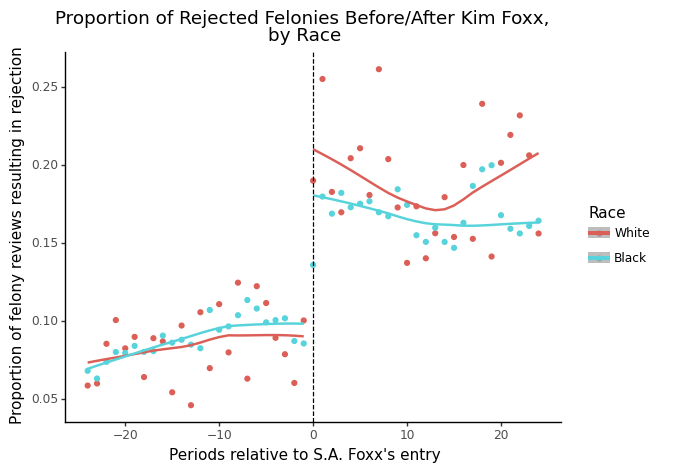

<ggplot: (167286987502)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/intake_bw_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [9]:
# creating a by-race summary of felony review results
intake_bw_summary = intake_bw.groupby(['sa_timedelta', 'is_black'])['fr_is_rejected'].agg([('prop', 'mean'), 
                                                                                           ('n', 'sum')]).reset_index()

# filtering to specific timedelta
intake_bw_summary = intake_bw_summary[(intake_bw_summary.sa_timedelta >= -24) & 
                                      (intake_bw_summary.sa_timedelta <= 24)].copy()

# creating a by-race trend of felony review results
intake_bw_graph = (
    
    ggplot(intake_bw_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                  group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = intake_bw_summary[intake_bw_summary.sa_timedelta < 0]) +
    geom_smooth(data = intake_bw_summary[intake_bw_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Months relative to S.A. Foxx's entry", 
         y = 'Proportion of felony reviews resulting in rejection', 
         title = 'Proportion of Rejected Felonies Before/After Kim Foxx, \nby Race') +
    scale_color_discrete(labels = ['White', 'Black']) +
    theme_classic() +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
intake_bw_graph

# saving the graph
intake_bw_graph.save("../output/intake_bw_graph.png", width = 5, height = 5, dpi = 100)

Creating the same type of graph but differentiating by offense categories (considering the top 5 categories only): 

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

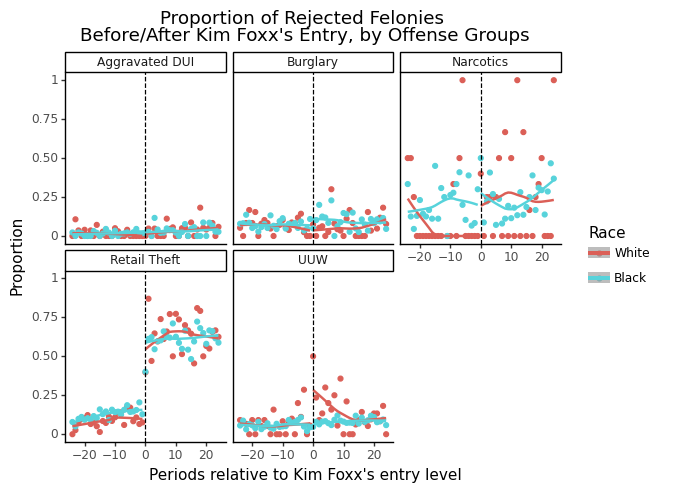

<ggplot: (167287561515)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/intake_bw_top5_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals

In [10]:
# storing the top 5 offense category in a list
intake_top5_offense = list(intake_bw.UPDATE_OFFENSE_CATEGORY.value_counts().reset_index()['index'][0:5])

# filtering for top 5 offenses 
intake_bw_top5_summary = intake_bw[intake_bw.UPDATE_OFFENSE_CATEGORY.isin(intake_top5_offense)].copy()

# renaming UUW 
intake_bw_top5_summary['UPDATE_OFFENSE_CATEGORY'] = intake_bw_top5_summary.UPDATE_OFFENSE_CATEGORY.str.replace('UUW - Unlawful Use of Weapon',
                                                                                                               'UUW')

# creating a by-race summary of felony review results
intake_bw_top5_summary = intake_bw_top5_summary.groupby(['sa_timedelta','UPDATE_OFFENSE_CATEGORY', 
                                                         'is_black'])['fr_is_rejected'].agg([('prop', 'mean'), 
                                                                                             ('n', 'sum')]).reset_index()

# filtering to specific timedelta
intake_bw_top5_summary = intake_bw_top5_summary[(intake_bw_top5_summary.sa_timedelta >= -24) & 
                                                (intake_bw_top5_summary.sa_timedelta <= 24)].copy()

intake_bw_top5_summary = intake_bw_top5_summary.sort_values(['UPDATE_OFFENSE_CATEGORY', 'is_black', 'sa_timedelta'])

# creating a by-race trend of felony review results
intake_bw_top5_graph = (
    
    ggplot(intake_bw_top5_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                       group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = intake_bw_top5_summary[intake_bw_top5_summary.sa_timedelta < 0]) +
    geom_smooth(data = intake_bw_top5_summary[intake_bw_top5_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Months relative to Kim Foxx's entry level", 
         y = 'Proportion', 
         title = "Proportion of Rejected Felonies \nBefore/After Kim Foxx's Entry, by Offense Groups") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap('UPDATE_OFFENSE_CATEGORY') +
    theme_classic() +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
intake_bw_top5_graph

# saving the graph
intake_bw_top5_graph.save("../output/intake_bw_top5_graph.png", width = 5, height = 5, dpi = 100)

## Incarceration gaps

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


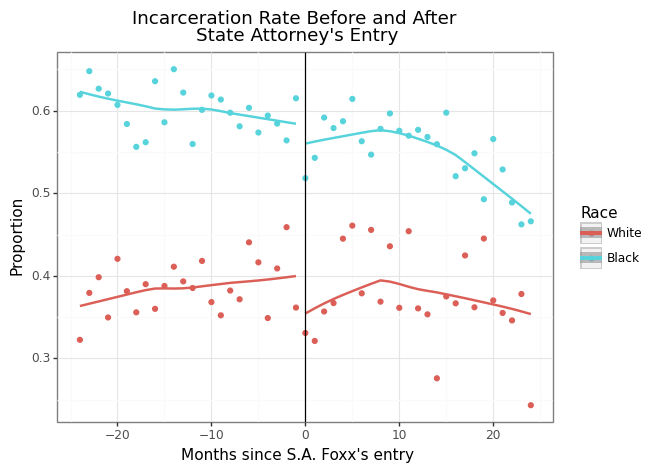

<ggplot: (167296745463)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/incarc_bw_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [11]:
# producing a by-race summary of incarceration proportion
incarc_bw_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['is_incarcerated'].agg([('prop', 'mean'), ('n', 'size')]).reset_index()

# filtering to specific timedelta
incarc_bw_summary = incarc_bw_summary[(incarc_bw_summary.sa_timedelta >= -24) & 
                                      (incarc_bw_summary.sa_timedelta <= 24)].copy()

# creating a time trend graph, by race
incarc_bw_graph = (
    ggplot(incarc_bw_summary, aes(x = 'sa_timedelta', y = 'prop', color = 'is_black')) + 
    geom_point() + 
    geom_smooth(data = incarc_bw_summary[incarc_bw_summary['sa_timedelta'] < 0]) +
    geom_smooth(data = incarc_bw_summary[incarc_bw_summary['sa_timedelta'] >= 0]) +
    theme_bw() + 
    labs(x = "Months since S.A. Foxx's entry", 
         y = "Proportion", 
         title = "Incarceration Rate Before and After \nState Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) + 
    guides(color = guide_legend(title = 'Race')) + 
    geom_vline(xintercept = 0)
)

# showing the plot
incarc_bw_graph

# exporting the plot
incarc_bw_graph.save("../output/incarc_bw_graph.png", width = 5, height = 5, dpi = 100)

Looking at specific offense categories: 

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

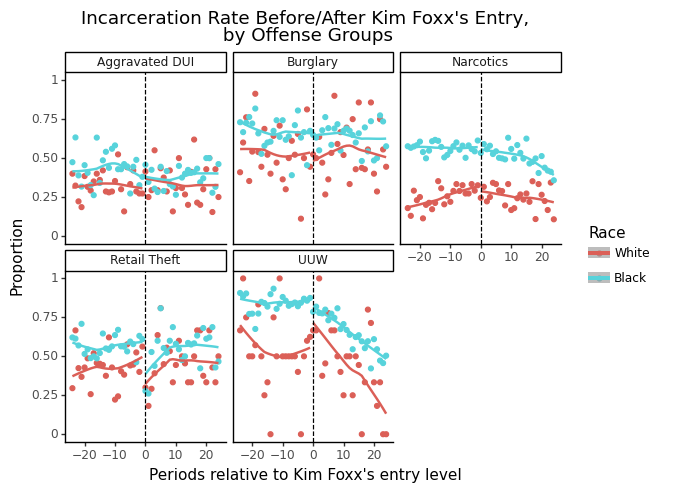

<ggplot: (167296828772)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/incarc_bw_top5_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals

In [12]:
# storing the top 5 offense category in a list
incarc_top5_offense = list(sentencing_bw.UPDATED_OFFENSE_CATEGORY.value_counts().reset_index()['index'][0:5])

# filtering for top 5 offenses 
incarc_bw_top5_summary = sentencing_bw[sentencing_bw.UPDATED_OFFENSE_CATEGORY.isin(incarc_top5_offense)].copy()

# renaming UUW 
incarc_bw_top5_summary['UPDATED_OFFENSE_CATEGORY'] = incarc_bw_top5_summary.UPDATED_OFFENSE_CATEGORY.str.replace('UUW - Unlawful Use of Weapon',
                                                                                                                 'UUW')

# creating a by-race summary of felony review results
incarc_bw_top5_summary = incarc_bw_top5_summary.groupby(['sa_timedelta','UPDATED_OFFENSE_CATEGORY', 
                                                         'is_black'])['is_incarcerated'].agg([('prop', 'mean'), 
                                                                                             ('n', 'sum')]).reset_index()

# filtering to specific timedelta
incarc_bw_top5_summary = incarc_bw_top5_summary[(incarc_bw_top5_summary.sa_timedelta >= -24) & 
                                                (incarc_bw_top5_summary.sa_timedelta <= 24)].copy()

incarc_bw_top5_summary = incarc_bw_top5_summary.sort_values(['UPDATED_OFFENSE_CATEGORY', 'is_black', 'sa_timedelta'])

# creating a by-race trend of felony review results
incarc_bw_top5_graph = (
    
    ggplot(incarc_bw_top5_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                       group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = incarc_bw_top5_summary[incarc_bw_top5_summary.sa_timedelta < 0]) +
    geom_smooth(data = incarc_bw_top5_summary[incarc_bw_top5_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Months relative to Kim Foxx's entry level", 
         y = 'Proportion', 
         title = "Incarceration Rate Before/After Kim Foxx's Entry,\n by Offense Groups") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap('UPDATED_OFFENSE_CATEGORY') +
    theme_classic() +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
incarc_bw_top5_graph

# saving the graph
incarc_bw_top5_graph.save("../output/incarc_bw_top5_graph.png", width = 5, height = 5, dpi = 100)

## Probation gaps

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


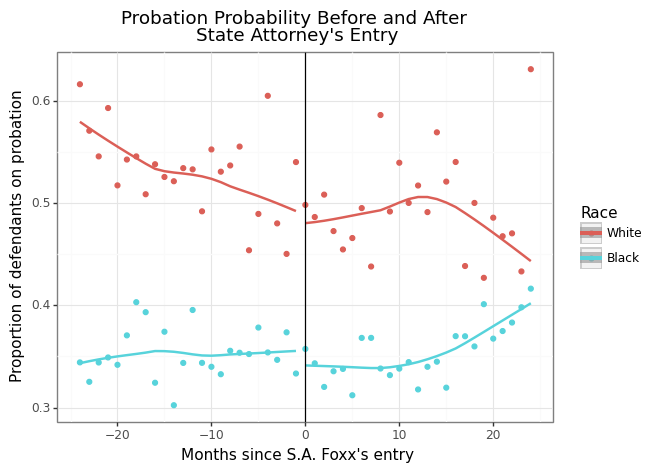

<ggplot: (167296380727)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/probation_gap_bw.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [13]:
# producing a by-race summary of probation proportion
sentencing_bw_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['is_on_probation'].agg([('prop', 'mean'), ('n', 'size')]).reset_index()

# filtering to specific timedelta
sentencing_bw_summary = sentencing_bw_summary[(sentencing_bw_summary.sa_timedelta >= -24) & 
                                              (sentencing_bw_summary.sa_timedelta <= 24)].copy()

# creating a time trend graph, by race
probation_gap_bw = (
    ggplot(sentencing_bw_summary, aes(x = 'sa_timedelta', y = 'prop', color = 'is_black')) + 
    geom_point() + 
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] < 0]) +
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] >= 0]) +
    theme_bw() + 
    labs(x = "Months since S.A. Foxx's entry", 
         y = "Proportion of defendants on probation", 
         title = "Probation Probability Before and After \nState Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) + 
    guides(color = guide_legend(title = 'Race')) + 
    geom_vline(xintercept = 0)
)

# showing the plot
probation_gap_bw

# exporting the plot
probation_gap_bw.save("../output/probation_gap_bw.png", width = 5, height = 5, dpi = 100)

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


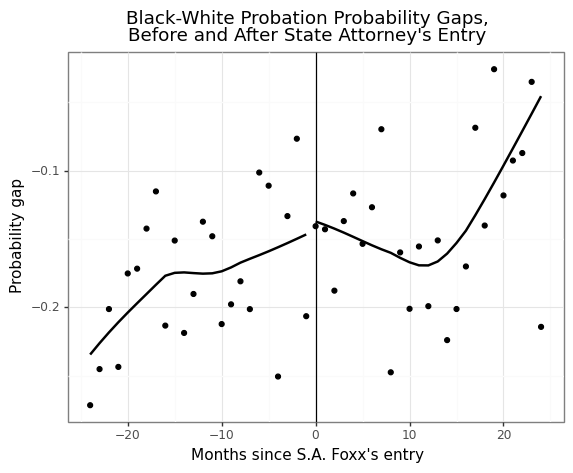

<ggplot: (167287535189)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/probation_gap_bw2.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [14]:
# producing a by-race summary of probation proportion
sentencing_bw_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['is_on_probation'].agg([('prop', 'mean'), ('n', 'size')]).reset_index()

# filtering to specific timedelta
sentencing_bw_summary = sentencing_bw_summary[(sentencing_bw_summary.sa_timedelta >= -24) & 
                                              (sentencing_bw_summary.sa_timedelta <= 24)].copy()

# preparing the wide data
sentencing_bw_summary = pd.pivot(sentencing_bw_summary, index=['sa_timedelta'], columns='is_black', values = ['prop', 'n']).reset_index()
new_names = ['sa_timedelta', 'prop_white', 'prop_black', 'n_white', 'n_black']
sentencing_bw_summary.columns = new_names
sentencing_bw_summary['prop_bw_gap'] = sentencing_bw_summary['prop_black'] - sentencing_bw_summary['prop_white'] 

# plotting
probation_gap_bw2 = (
    ggplot(sentencing_bw_summary, aes(x = 'sa_timedelta', y = 'prop_bw_gap')) + 
    geom_point() + 
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] < 0]) +
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] >= 0]) +
    theme_bw() + 
    labs(x = "Months since S.A. Foxx's entry", 
         y = "Probability gap", 
         title = "Black-White Probation Probability Gaps,\nBefore and After State Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) + 
    guides(color = guide_legend(title = 'Race')) + 
    geom_vline(xintercept = 0)
)

# showing the plot
probation_gap_bw2

# exporting the plot
probation_gap_bw2.save("../output/probation_gap_bw2.png", width = 5, height = 5, dpi = 100)

Plotting the overall probation rate, by offense groups and black-white:

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

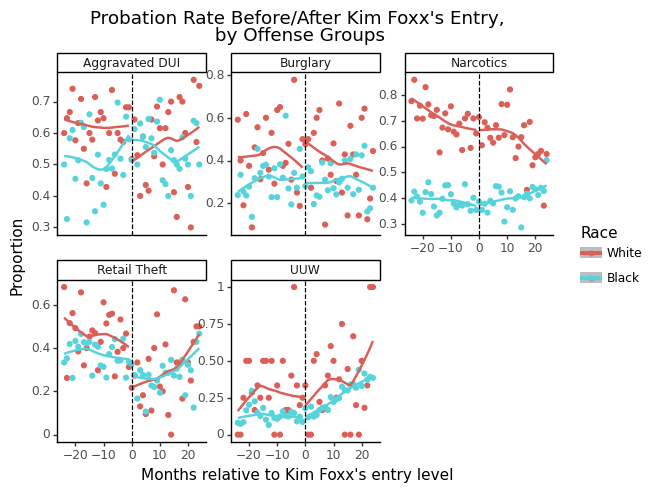

<ggplot: (167316073343)>

In [55]:
# filtering for top 5 offenses 
prob_bw_top5_summary = sentencing_bw[sentencing_bw.UPDATED_OFFENSE_CATEGORY.isin(incarc_top5_offense)].copy()

# renaming UUW 
prob_bw_top5_summary['UPDATED_OFFENSE_CATEGORY'] = prob_bw_top5_summary.UPDATED_OFFENSE_CATEGORY.str.replace('UUW - Unlawful Use of Weapon',
                                                                                                             'UUW')

# # creating a by-race summary of felony review results
prob_bw_top5_summary = prob_bw_top5_summary.groupby(['sa_timedelta','UPDATED_OFFENSE_CATEGORY', 
                                                     'is_black'])['is_on_probation'].agg([('prop', 'mean'), 
                                                                                          ('n', 'sum')]).reset_index()

# filtering to specific timedelta
prob_bw_top5_summary = prob_bw_top5_summary[(prob_bw_top5_summary.sa_timedelta >= -24) & 
                                            (prob_bw_top5_summary.sa_timedelta <= 24)].copy()

prob_bw_top5_summary = prob_bw_top5_summary.sort_values(['UPDATED_OFFENSE_CATEGORY', 'is_black', 'sa_timedelta'])

# creating a by-race trend of felony review results
prob_bw_top5_graph = (
    
    ggplot(prob_bw_top5_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                     group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = prob_bw_top5_summary[prob_bw_top5_summary.sa_timedelta < 0]) +
    geom_smooth(data = prob_bw_top5_summary[prob_bw_top5_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Months relative to Kim Foxx's entry level", 
         y = 'Proportion', 
         title = "Probation Rate Before/After Kim Foxx's Entry,\n by Offense Groups") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap('UPDATED_OFFENSE_CATEGORY', scales = "free_y") +
    theme_classic() +
    theme(panel_spacing=.25) +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
prob_bw_top5_graph

# # saving the graph
# prob_bw_top5_graph.save("../output/prob_bw_top5_graph.png", width = 5, height = 5, dpi = 100)

## Sentencing time

Plotting the overall sentencing time, by black-white:

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


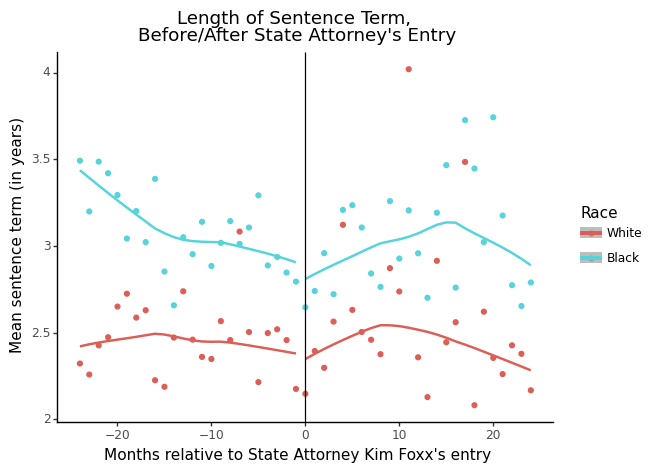

<ggplot: (167310151455)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/sentencing_term_bw.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [51]:
# group by time periods 
sentence_time_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['sentencing_term_y'].agg([('mean_sentence', 'mean'), 
                                                                                                      ('median_sentence', 'median'), 
                                                                                                      ('n','size')]).reset_index()

# filtering to certain bandwidth
sentence_time_summary = sentence_time_summary[(sentence_time_summary.sa_timedelta >= -24) & 
                                              (sentence_time_summary.sa_timedelta <= 24)]

# plotting the results
sentencing_term_bw = (
    ggplot(sentence_time_summary, aes(x = "sa_timedelta", y = "mean_sentence", color = "is_black")) +
    geom_point() +
    geom_smooth(data = sentence_time_summary[sentence_time_summary.sa_timedelta < 0]) +
    geom_smooth(data = sentence_time_summary[sentence_time_summary.sa_timedelta >= 0]) +
    geom_vline(aes(xintercept = 0)) +
    labs(x = "Months relative to State Attorney Kim Foxx's entry", 
         y = "Mean sentence term (in years)", 
         title = "Length of Sentence Term, \nBefore/After State Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) +
    guides(color = guide_legend(title = "Race")) +
    theme_classic()
)

# showing the plot
sentencing_term_bw

# exporting the plot
sentencing_term_bw.save("../output/sentencing_term_bw.png", width = 5, height = 5, dpi = 100)

Plotting sentencing term by top five offenses:

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

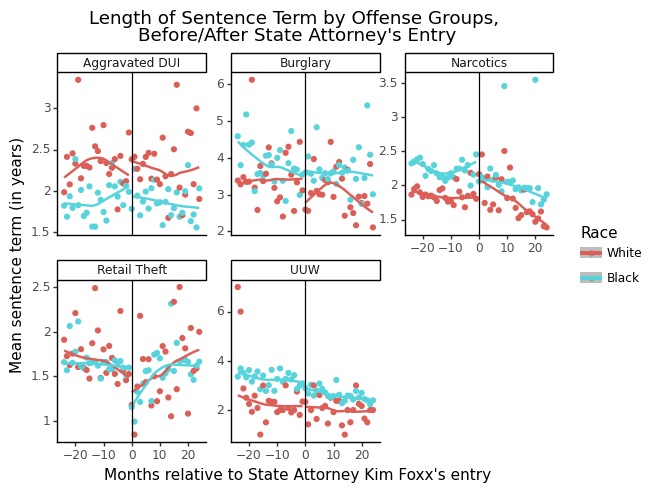

<ggplot: (167309626724)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/sentencing_term_bw2.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals 

In [50]:
# creating by-group summary of sentencing term 
sentencing_time_summary_byoff = sentencing_bw.groupby(['sa_timedelta', 'is_black', 
                                                       'UPDATED_OFFENSE_CATEGORY'])['sentencing_term_y'].agg([('mean_sentence', 'mean'), 
                                                                                                              ('n', 'size')]).reset_index()

# filtering the summary dataset 
sentencing_time_summary_byoff = sentencing_time_summary_byoff[(sentencing_time_summary_byoff.UPDATED_OFFENSE_CATEGORY.isin(incarc_top5_offense)) &
                                                              (sentencing_time_summary_byoff.sa_timedelta >= -24) & 
                                                              (sentencing_time_summary_byoff.sa_timedelta <= 24)].copy()

# renaming UUW 
sentencing_time_summary_byoff['UPDATED_OFFENSE_CATEGORY'] = sentencing_time_summary_byoff.UPDATED_OFFENSE_CATEGORY.str.replace('UUW - Unlawful Use of Weapon', 
                                                                                                                               'UUW')


# creating the viz 
sentencing_term_bw2 = (
    ggplot(sentencing_time_summary_byoff, aes(x = "sa_timedelta", y = 'mean_sentence', color = "is_black")) +
    geom_point() +
    geom_smooth(data = sentencing_time_summary_byoff[sentencing_time_summary_byoff.sa_timedelta < 0]) +
    geom_smooth(data = sentencing_time_summary_byoff[sentencing_time_summary_byoff.sa_timedelta >= 0]) +
    geom_vline(aes(xintercept = 0)) +
    labs(x = "Months relative to State Attorney Kim Foxx's entry", 
         y = "Mean sentence term (in years)", 
         title = "Length of Sentence Term by Offense Groups, \nBefore/After State Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap("UPDATED_OFFENSE_CATEGORY", scales = "free_y") +
    theme_classic() +
    theme(panel_spacing=.25) +
    guides(color = guide_legend(title = "Race"))
)

# showing the plot
sentencing_term_bw2

# exporting the plot
sentencing_term_bw2.save("../output/sentencing_term_bw2.png", width = 5, height = 5, dpi = 100)